# Principal Component Analysis and Linear Discriminant Analysis |  Aut19
## Jason Cain & Prof. Neda Bagheri 
---

This notebook is designed to walk through a basic implementation of Principal Component Analysis and Linear Discriminant Analysis using the `scikit-learn (sklearn)` library, which you should already have installed. It also uses `pandas`, `numpy`, and `seaborn`. To install new libraries type the following function into your terminal. 
<br/> *Note: you likely already have these installed. If you have an import error, this process is likely the solution*.
```
pip3 install --user pandas matplotlib numpy seaborn sklearn
```

In [1]:
#import standard statistics and math libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for jupyter notebooks, plt.show() not necessary
%matplotlib inline 

#there are some deprecation warnings that are not important
import warnings
warnings.filterwarnings("ignore")

#change figure size
sns.set(rc={'figure.figsize':(11.7,8.27)}) 

#global variable for font size in plot titles
TITLE = {
    'fontsize':20,
    'fontweight':'bold'
}    

#### Import dataset 

In [2]:
dataset = pd.read_csv('iris_dataset.csv')
dataset.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
128,6.4,2.8,5.6,2.1,virginica
23,5.1,3.3,1.7,0.5,setosa
66,5.6,3.0,4.5,1.5,versicolor
40,5.0,3.5,1.3,0.3,setosa
55,5.7,2.8,4.5,1.3,versicolor


#### Import necessary functions from `sklearn` library

In [3]:
# Import tools from sklearn necesssary for PCA and LDA
from sklearn.preprocessing import StandardScaler # mean center and scale SD
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Define the features of the dataset. Remember: PCA is unsupervised.

In [4]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = ['species']
X = dataset[features]
y = dataset[target]

#### Visualize standardized (z-scored) data. What is StandardScaler doing?

Standardizing data is the process of adjusting a distribution such that the mean of the distribution is 0 and the standard deviation is 1. This process is done by mean centering the data, and dividing the mean centered data by the standard deviation. The code below demonstrates how to standardize data with `StandardScaler`.

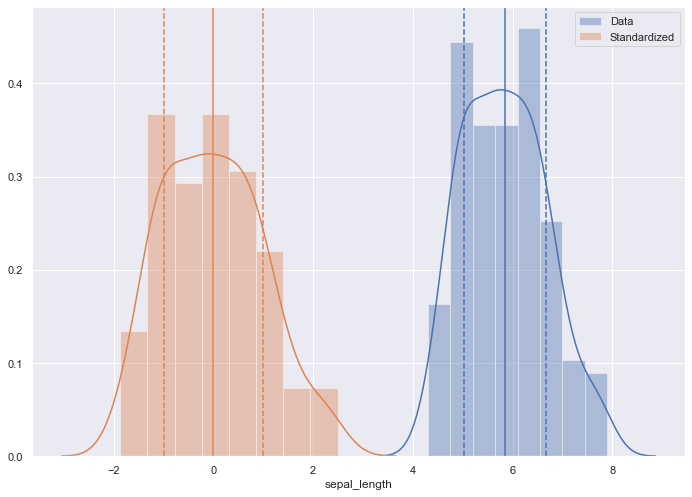

In [5]:
def zscore_plot(x):
    sns.distplot(x, label='Data')
    mean = np.mean(x)
    std = np.std(x)
    x_zscore = (x - mean)/(std)
    zscored_mean = np.mean(x_zscore)
    zscored_std = np.std(x_zscore)
    sns.distplot(x_zscore, label='Standardized')
    plt.axvline(mean, color='C0', linestyle='-')
    plt.axvline(mean + std, color='C0', linestyle='--')
    plt.axvline(mean - std, color='C0', linestyle='--')
    plt.axvline(zscored_mean, color='C1', linestyle='-')
    plt.axvline(zscored_mean+zscored_std, color='C1', linestyle='--')
    plt.axvline(zscored_mean-zscored_std, color='C1', linestyle='--')
    plt.legend(loc='best')
    plt.show()
    
zscore_plot(X['sepal_length'])
 

## Implement PCA and generate the corresponding skree plot.

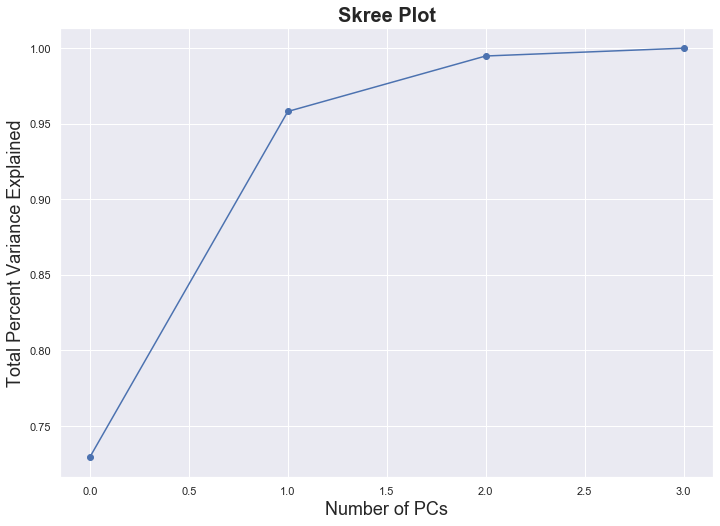

In [6]:
# scree plot
def ScreePlot(X):
    """
    Uses sklearn PCA tool to visualize Skree plot
    input:
    X: Pandas Dataframe or Numpy Array of features
    
    output:
    None
    """
    X_standardized = StandardScaler().fit_transform(X)
    pca = PCA().fit(X_standardized)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
    plt.title('Skree Plot', fontdict=TITLE)
    plt.xlabel('Number of PCs', fontsize=18)
    plt.ylabel('Total Percent Variance Explained', fontsize=18)
    plt.show()
    
ScreePlot(X)

#### Project the data onto the first two principal components.

In [7]:
def PerformPCA(X, n_dimensions=2):
    """
    Uses sklearn PCA tool to perform PCA
    input:
    X: Pandas Dataframe or Numpy Array of features
    n_dimensions: Number of PCs to fit
    
    output:
    X_pca: Pandas dataframe with column titles of PC1,...,PCn
    """
    X_standardized = StandardScaler().fit_transform(X)
    pca = PCA(n_components=n_dimensions)
    pca.fit(X_standardized)
    X_pca_array = pca.transform(X_standardized)
    column_names = ['PC{}'.format(i+1) for i in range(n_dimensions)] 
    X_pca = pd.DataFrame(X_pca_array, columns=column_names)
    return X_pca

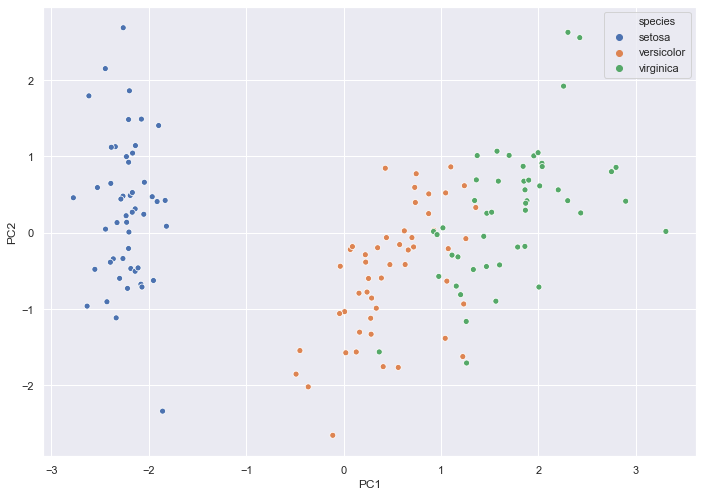

In [8]:
PCA_df = PerformPCA(X)
PCA_df = PCA_df.join(y)
sns.scatterplot(x='PC1',y='PC2',hue='species',data=PCA_df,markers=True)
plt.show()

## Implement LDA 

In [9]:
def PerformLDA(X, y, n_dimensions=2):
    """
    Uses sklearn LinearDiscriminantAnalysis tool to perform LDA
    input:
    X: Pandas Dataframe or Numpy Array of features
    y: Pandas Series or Numpy Vector of target 
    n_dimensions: Number of LDs to fit
    
    output:
    X_lda: Pandas dataframe with column titles of LD1,...,LDn
    """
    X_standardized = StandardScaler().fit_transform(X)
    lda = LinearDiscriminantAnalysis(n_components=n_dimensions)
    lda.fit(X_standardized,y)
    X_lda_array = lda.transform(X_standardized)
    column_names = ['LD{}'.format(i+1) for i in range(n_dimensions)] 
    X_lda = pd.DataFrame(X_lda_array, columns=column_names)
    return X_lda

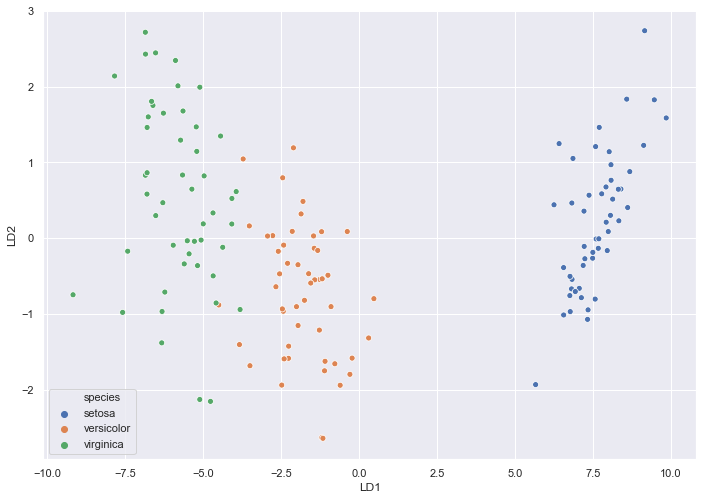

In [10]:
LDA_df = PerformLDA(X, y)
LDA_df = LDA_df.join(y)
sns.scatterplot(x='LD1',y='LD2',hue='species',data=LDA_df)
plt.show()

## Project the data onto the first principal component and observe how the different classes separate in the resulting histogram.

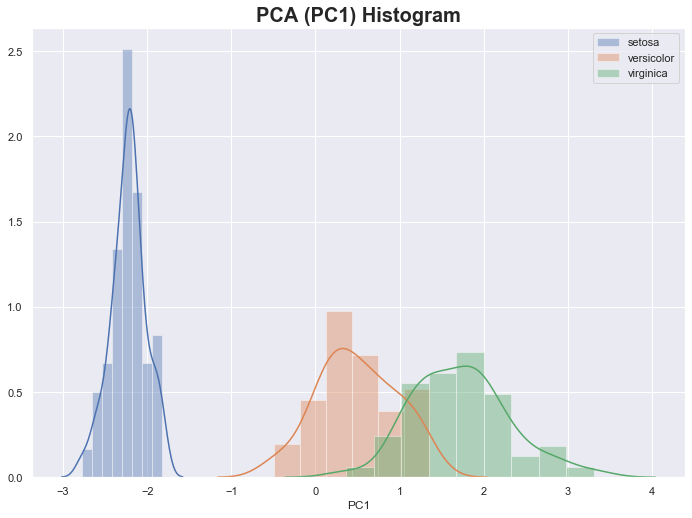

In [11]:
for species in PCA_df['species'].unique():
    sns.distplot(PCA_df[PCA_df['species']==species]['PC1'], label=species)
plt.title('PCA (PC1) Histogram', fontdict=TITLE)
plt.legend(loc='best')
plt.show()

## Project the data onto the first discriminant component and observe how the different classes separate in the resulting histogram.

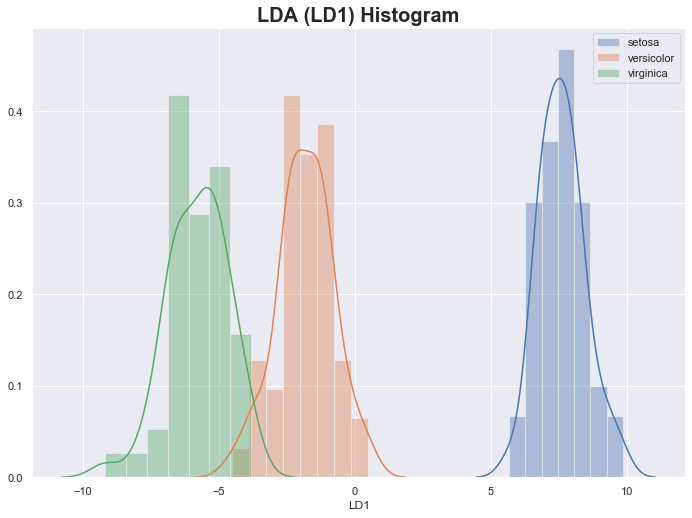

In [12]:
for species in LDA_df['species'].unique():
    sns.distplot(LDA_df[LDA_df['species']==species]['LD1'], label=species)
plt.title('LDA (LD1) Histogram', fontdict=TITLE)
plt.legend(loc='best')
plt.show()